### 我們認真的來做一下數據分析

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 準備模擬資料

我們來做一條線，比如說 
$$  f(x) = 1.2x+0.8 $$  <!--#2個錢字號是置中-->

準備好50個點

In [2]:
x = np.linspace(0, 5, 50)

畫出圖形來。

In [3]:
y = 1.2*x+0.8

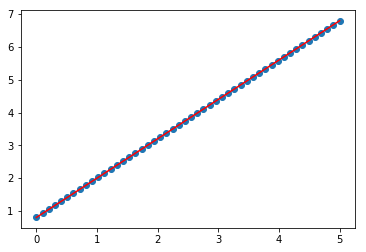

In [6]:
plt.scatter(x, y) # observate datas
plt.plot(x, y, 'r') # real datas

### 加入 niose項，看來更真實

在統計上，假設: 
$$ f(x)+ \varepsilon(x) $$ 
也就是都有個noise項。

In [7]:
y = 1.2*x+ 0.8 + 0.6*np.random.randn(50)

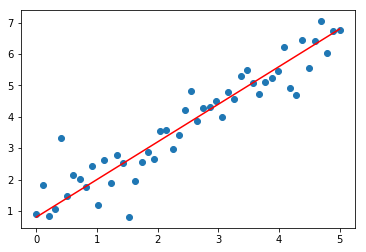

In [8]:
plt.scatter(x,y)
plt.plot(x, 1.2*x + 0.8, 'r')

### 做線性回歸找出那條線

做線性回歸有很多套件，但我們這裡用sklearn裡的 LinearRegression來做，線性回歸

In [9]:
x

array([0.        , 0.10204082, 0.20408163, 0.30612245, 0.40816327,
       0.51020408, 0.6122449 , 0.71428571, 0.81632653, 0.91836735,
       1.02040816, 1.12244898, 1.2244898 , 1.32653061, 1.42857143,
       1.53061224, 1.63265306, 1.73469388, 1.83673469, 1.93877551,
       2.04081633, 2.14285714, 2.24489796, 2.34693878, 2.44897959,
       2.55102041, 2.65306122, 2.75510204, 2.85714286, 2.95918367,
       3.06122449, 3.16326531, 3.26530612, 3.36734694, 3.46938776,
       3.57142857, 3.67346939, 3.7755102 , 3.87755102, 3.97959184,
       4.08163265, 4.18367347, 4.28571429, 4.3877551 , 4.48979592,
       4.59183673, 4.69387755, 4.79591837, 4.89795918, 5.        ])

y

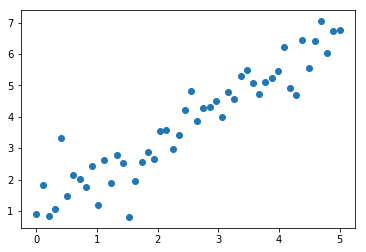

In [10]:
plt.scatter(x,y)

這裡要注意我們本來的x是

$$ [x1,x2,...,x50] $$

但現在要的是 (scikit-learn需要的)

$$ [[x1],[x2],...,[x50]] $$

In [12]:
from sklearn.linear_model import LinearRegression

### 開線性回歸機的方法

機器的變數名稱 = LinearRegression()

In [16]:
regr = LinearRegression()

### 改變array形狀的方法

array的變數名.reshape(新的形狀)

In [20]:
X = x.reshape(50,1)

### 開始讓線性回歸機學習的方法
機器的變數名稱.fit(輸入資料, 正確答案)

In [19]:
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### 開始預測的方法
機器的變數名稱.predict(輸入資料)

### 小寫y 是正確答案

In [21]:
Y = regr.predict(X)

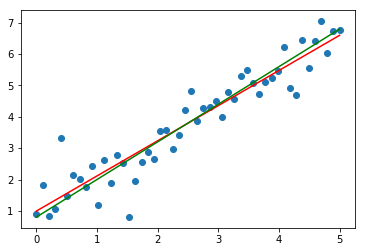

In [26]:
plt.scatter(x, y) # 觀察到的
plt.plot(x, Y, 'r')   # 模擬的
plt.plot(x, 1.2*x +0.8, 'g')  # 真實世界的

## Overfitting

In [27]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [28]:
from ipywidgets import interact

In [30]:
X = np.linspace(0, 5, 1000)

def my_fit(n):
    Y = 4*np.sin(n*X) + 4
    plt.scatter(x, y)
    plt.plot(X, Y, 'r')
    plt.show()

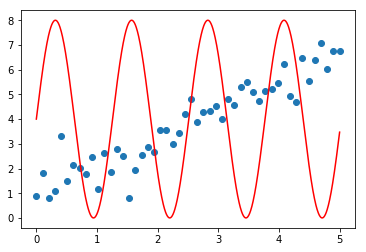

In [31]:
my_fit(5)

In [32]:
interact(my_fit, n=(1, 500))

interactive(children=(IntSlider(value=250, description='n', max=500, min=1), Output()), _dom_classes=('widget-…

<function __main__.my_fit(n)>

### 標準函數訓練及測試

#### 分訓練資料、測試資料

一般我們想要看算出來的逼近函數在預測上是不是可靠,會把一些資料留給"測試",就是不讓電腦在計算時"看到"這些測試資料。
等函數學成了以後,再來測試準不準確。這時我們可以用

**sklearn.model_selection**